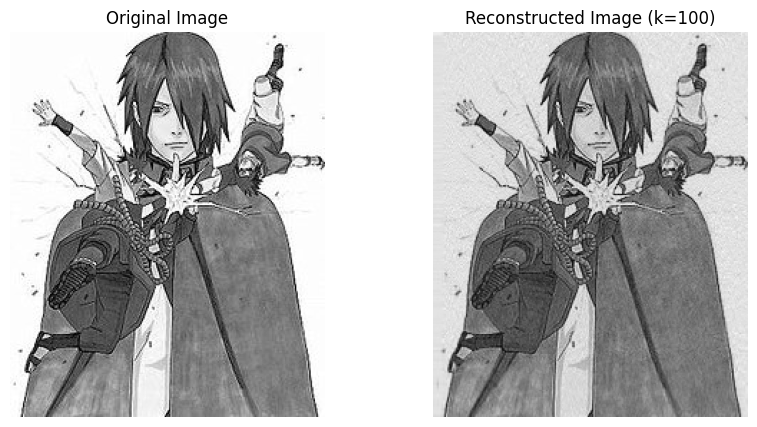

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def reconstruct_image(U, S, V, K):
    """Reconstruct the image using the top K singular values."""
    # Ensure S is a diagonal matrix for the top K singular values
    S_k = np.zeros((U.shape[1], V.shape[0]))
    np.fill_diagonal(S_k, S[:K])
    
    # Matrix multiplication to reconstruct the image
    cmpimg = U[:, :K] @ S_k[:K,:K] @ V[:K, :]
    
    return cmpimg

# Load image
img = Image.open("anime.jpg").convert('L')
img = np.array(img, float)  # Convert image to a float array

# Compute SVD
U, S, Vt = np.linalg.svd(img, full_matrices=False)  # Use full_matrices=False for consistency with dimensions
# Choose a suitable K
K = 100  # Experiment with different values
reconstructed_image = reconstruct_image(U, S, Vt, K)

# Display the original and reconstructed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')  # Hide axes

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title(f"Reconstructed Image (k={K})")
plt.axis('off')  # Hide axes
plt.show()
